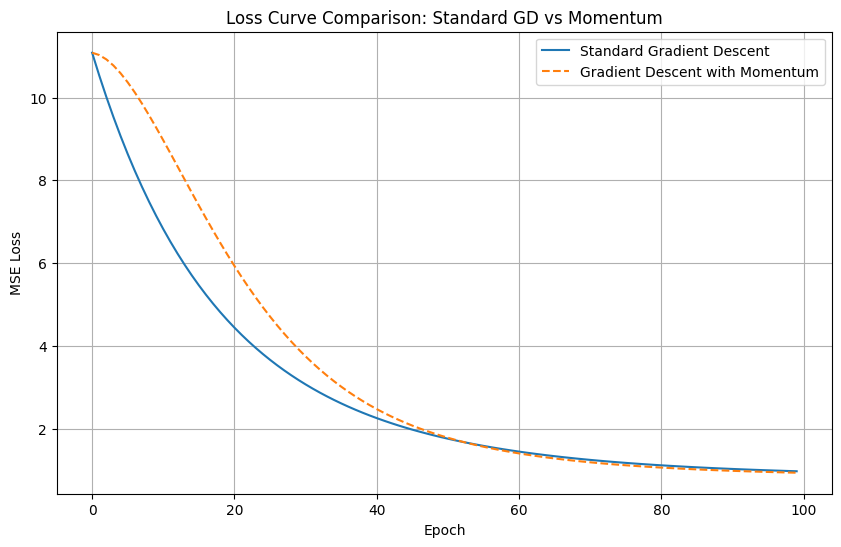


Analysis

Standard Gradient Descent:
   Loss decreases steadily but slowly.
   Might get stuck or oscillate around minima.

Gradient Descent with Momentum:
   Converges faster!
   Momentum helps 'push' the weights downhill and dampens oscillations.
   Acts like a ball rolling downhill — builds speed but smooths out the path.

Conclusion: Adding momentum generally leads to faster and smoother convergence.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load Dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# 2. Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Initialize Parameters
np.random.seed(42)
n_features = X_train.shape[1]
weights_gd = np.random.randn(n_features)
bias_gd = 0.0

weights_momentum = np.copy(weights_gd)
bias_momentum = bias_gd

# Velocity initialization for momentum
v_w = np.zeros_like(weights_gd)
v_b = 0.0

# Hyperparameters
learning_rate = 0.01
beta = 0.9
n_epochs = 100

# Lists to store losses
losses_gd = []
losses_momentum = []

# 4. Training loops
for epoch in range(n_epochs):
    # --------- Standard Gradient Descent ----------
    preds_gd = np.dot(X_train, weights_gd) + bias_gd
    errors_gd = preds_gd - y_train
    loss_gd = np.mean(errors_gd ** 2)
    losses_gd.append(loss_gd)

    dw_gd = (2 / X_train.shape[0]) * np.dot(X_train.T, errors_gd)
    db_gd = (2 / X_train.shape[0]) * np.sum(errors_gd)

    weights_gd -= learning_rate * dw_gd
    bias_gd -= learning_rate * db_gd

    # --------- Gradient Descent with Momentum ----------
    preds_momentum = np.dot(X_train, weights_momentum) + bias_momentum
    errors_momentum = preds_momentum - y_train
    loss_momentum = np.mean(errors_momentum ** 2)
    losses_momentum.append(loss_momentum)

    dw_momentum = (2 / X_train.shape[0]) * np.dot(X_train.T, errors_momentum)
    db_momentum = (2 / X_train.shape[0]) * np.sum(errors_momentum)

    # Update velocity
    v_w = beta * v_w + (1 - beta) * dw_momentum
    v_b = beta * v_b + (1 - beta) * db_momentum

    # Update parameters using velocity
    weights_momentum -= learning_rate * v_w
    bias_momentum -= learning_rate * v_b

# 5. Plotting loss comparison
plt.figure(figsize=(10,6))
plt.plot(range(n_epochs), losses_gd, label='Standard Gradient Descent')
plt.plot(range(n_epochs), losses_momentum, label='Gradient Descent with Momentum', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve Comparison: Standard GD vs Momentum')
plt.legend()
plt.grid()
plt.show()

# 6. Analysis
print("""
Analysis

Standard Gradient Descent:
   Loss decreases steadily but slowly.
   Might get stuck or oscillate around minima.

Gradient Descent with Momentum:
   Converges faster!
   Momentum helps 'push' the weights downhill and dampens oscillations.
   Acts like a ball rolling downhill — builds speed but smooths out the path.

Conclusion: Adding momentum generally leads to faster and smoother convergence.
""")
